*** Interpolacion ***

 Tenemos una serie de datos y queremos dar un valor a un punto intermedio 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt ## PAQUETE OPTIMIZACION

Text(0,0.5,'y')

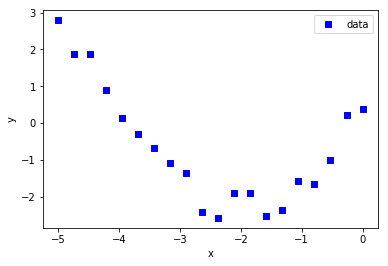

In [2]:
Data=np.loadtxt('Data1_modelling.txt') # 3 columnas, x, y , yerr
x=Data[:,0];y=Data[:,1]
plt.plot(x, y, 's',label='data',color='b')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

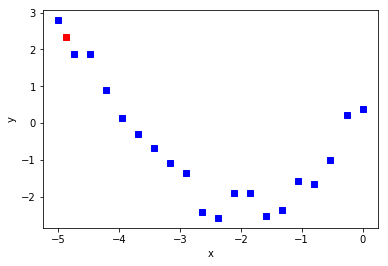

In [3]:
# queremos saber valor en el
# valor medio 
valy=(y[0]+y[1])/2
valx=(x[0]+x[1])/2
plt.plot(x, y, 's',label='data',color='b')
plt.plot(valx,valy,'rs')
plt.xlabel('x')
plt.ylabel('y')


Text(0,0.5,'y')

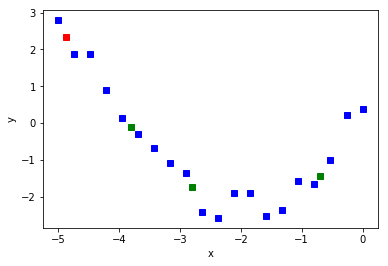

In [4]:
from scipy.interpolate import interp1d
f = interp1d(x, y) # kind='linear','cubic','cuadratic',... (por defecto linear)
# interp1d entre cada 2 puntos se ha estimado una recta
plt.plot(x, y, 's',label='data',color='b')
plt.plot(valx,f(valx),'rs')
plt.plot(-3.8,f(-3.8),'gs')
plt.plot(-2.8,f(-2.8),'gs')
plt.plot(-0.7,f(-0.7),'gs')
plt.xlabel('x')
plt.ylabel('y')


In [5]:
# Extrapolamos
yval=f(1)
plt.plot(1,yval,'ks')  # Falla ! no sabe extrapolar



ValueError: A value in x_new is above the interpolation range.

0.752295194488923


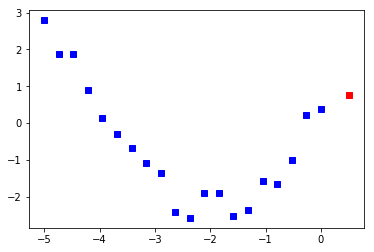

In [6]:
f = interp1d(x, y,fill_value='extrapolate')
yval=f(0.5)
print yval
plt.plot(x, y, 's',label='data',color='b')
plt.plot(0.5,yval,'rs')

yval     0.7522951944889229
interp1d 0.752295194488923


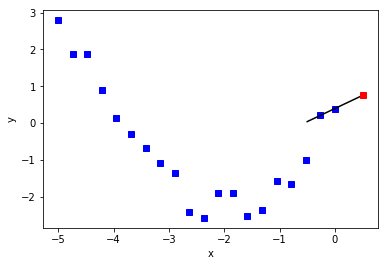

In [7]:
# extrapolación lineal
# buscamos recta dada por los últimos dos puntos, y=ax+b
a=(y[-1]-y[-2])/(x[-1]-x[-2])
b=y[-1]-x[-1]*a
# calculamos valor de la distancia a las 10 horas
yval=a*0.5+b
print 'yval    ',yval
print 'interp1d', f(0.5)
x3=np.arange(-0.5,0.6,0.1)
plt.plot(x, y, 's',label='data',color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x3,a*x3+b,'k')
plt.plot(0.5,yval,'rs')

a= 0.5986 b= 2.4025 c= 0.2347
        2
0.5986 x + 2.402 x + 0.2347


Text(0,0.5,'y')

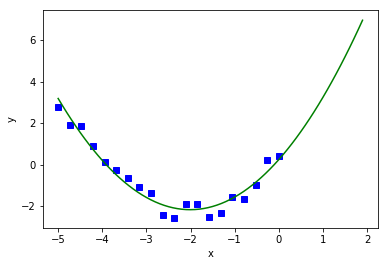

In [8]:
# Otra cosa que podemos hacer es ajustar un polinomio
par=np.polyfit(x,y,2)
print 'a=',np.round(par[0],4),'b=',np.round(par[1],4),'c=',np.round(par[2],4)
obj=np.poly1d(par)  # guarda la funcion obj=a[2]*x^2+a[1]*x+a[0]*x
print obj
plt.plot(x, y, 's',label='data',color='b')
x3=np.arange(-5,2,0.1)
# ahora ya podemos extrapolar

plt.plot(x3,obj(x3),'g')

plt.xlabel('x')
plt.ylabel('y')

(-5, 5)

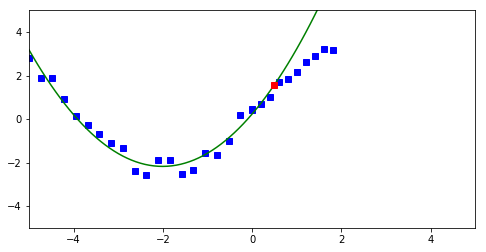

In [9]:
# recojemos más datos 
plt.figure(0,figsize=(8,4))
Data2=np.loadtxt('Data2_modelling.txt')
x2=Data2[:,0];y2=Data2[:,1]
x3=np.concatenate((x,x2)) # en un mismo array todos los datos
y3=np.concatenate((y,y2)) # en un mismo array todos los datos

plt.plot(x3[:30], y3[:30], 's',color='b',label='data')
plt.xlim(-5,5)
# el modelo ya no ajusta
xaux=np.arange(-5,5,0.1)
plt.plot(xaux,obj(xaux),color='g')
plt.plot(0.5,obj(0.5),'sr')
plt.ylim(-5,5)

# hemos extrapolado mal


results [2.83 0.8 ]
True param [2.9, 0.8]


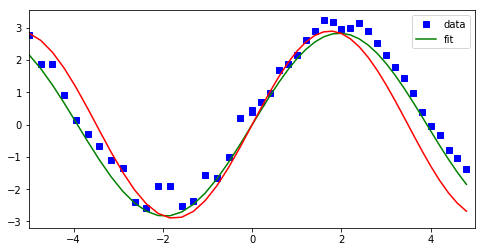

In [10]:
true_val=[2.9,0.8] # valores que he usado para generar los datos
plt.figure(0,figsize=(8,4))
# probamos otro tipo de funcion, tenemos la variable x y 3 parametros libres
def func(x, a, b):
     return a * np.sin(b*x)

# hacemos ajuste por mínimos cuadrados usando curve_fit
popt, pcov = opt.curve_fit(func, x3, y3)#,p0=(0.5,0.5,0.5))
# esto nos devolverá los parametros a,b y c
print 'results',np.round(popt,2)
print 'True param',true_val

a=popt[0];b=popt[1]
model=func(x3,a,b)

plt.plot(x3, y3, 's',color='b',label='data')
plt.plot(x3,model,'-',color='g',label='fit')
plt.xlim(-5,5)
plt.legend()

model2=func(x3,2.9,0.9)   # lo puedo comparar con los parámetros que alguien nos ha dado del modelo...
plt.plot(x3,model2,'-',color='r',label='old model')



(25,) (25,) (25,)


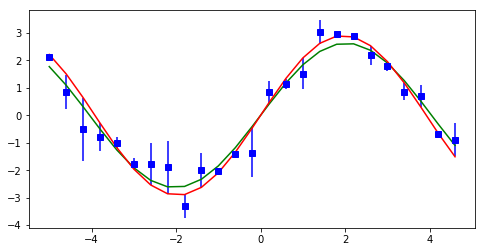

In [11]:
# añadimos información del ruido
Data2=np.loadtxt('Data2_modelling_noisy.txt')
x=Data2[:,0];y=Data2[:,1];yerr=Data2[:,2]
plt.figure(0,figsize=(8,4))
# volvemos a hacer fit
popt, pcov = opt.curve_fit(func, x, y)
# añadimos información del error
poptErr, pcov = opt.curve_fit(func, x,y,sigma=yerr)
# esto nos devolverá los parametros a y b
plt.errorbar(x, y, yerr=yerr,  marker='s',color='b',label='data',linestyle='')
a=popt[0];b=popt[1]
model=func(x,a,b)
modelErr=func(x,*poptErr)
plt.plot(x,model,'-',color='g')
plt.plot(x,modelErr,'-',color='r')


In [12]:
print 'results    ',np.round(popt,2)
print 'results Err',np.round(poptErr,2)
print 'True val   ', true_val
print 'Resultado más parecidos a los reales con poptErr'

results     [2.63 0.78]
results Err [2.91 0.8 ]
True val    [2.9, 0.8]
Resultado más parecidos a los reales con poptErr


In [ ]:
# results